In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from plot_funcs import paint_it_black, add_plot_labels

from pr_vs_groups_funcs import structure_cor_means
from pr_vs_groups_funcs import computations_with_baselines
from plot_vars import FONT_BIG

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
df = pd.read_excel("../data/sociogram_corrected.xlsx")
periods = pd.read_excel("../data/classroom_ids.xlsx").rename(columns = {"classroom_session_id":"classroom"})[["classroom", "period"]]
genders = pd.read_excel("../data/genders.xlsx").rename(columns = {"genere":"gender"}).loc[:, ["student", "gender"]]
tt = periods.merge(df).merge(genders, on="student")
cog_dists = pd.read_excel("../data/cog_distances.xlsx")
theta = pd.read_csv("../output/theta.csv").rename(columns = {"Unnamed: 0": "index"})
theta["index"] = theta["index"].astype(str)

# Create a dataframe randomizing membership vectors
theta_random = theta.copy(deep=True)
theta_random["index"] = np.random.permutation(theta_random["index"].values)

In [3]:
def correct_grades(x):
    # Correct grades to american system
    return x - 4

label_size = 12

lims = (-.45, .45)


yellow = "#fde725"
purple = "#440154"
blue_green = "#21918c"
green = "#6ece58"
blue_gray = "#3b528b"
soft_green = "#9ac64d"
dark_green = "#35b779"
colours = [green, purple]

In [4]:
def cor_evo_plot(cc, lims=None, plot_name="", legend=False, xlabels=True, ylabels=True):

    fig, ax = plt.subplots()
    i = 0
    for name, a in cc.items():

        x, y, ci1, vals = structure_cor_means(a, 1)
        x, y, ci2, vals = structure_cor_means(a, 2)
        x = correct_grades(x)

        ax.plot(x, y, label=name, color = colours[i])
        if name != "Observed":
            ax.fill_between(x, (y - ci1), (y + ci1), color=colours[i], alpha=.3)
            ax.fill_between(x, (y - ci2), (y + ci2), color=colours[i], alpha=.1)

        i = i + 1

    # vertical dashed line between 6 and 7
    plt.axvline(x=6.5, color='#31688e', linestyle='-.', linewidth = .75)
    ll = plt.axhline(y=0, color='coral', linestyle='--', linewidth = .75)

    plt.grid(False)

    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(2)  

    # Make ticks thicker
    ax.tick_params(width=2)

    if legend:
        plt.legend(loc=(0.6, .74), prop={'size': 14},frameon=False)
    if not xlabels:
        plt.xticks(np.arange(1, 11, 1), labels=[])
    else:
        plt.xticks(np.arange(1, 11, 1), labels=np.arange(1, 11, 1), fontsize=label_size)
        plt.xlabel("Grade", fontsize=label_size)
    if not ylabels:
        plt.yticks(np.arange(-0.4, 0.4, 0.1), labels=[])

    fig.tight_layout()
    fig.savefig(f"../plots/cors_{plot_name}.png", dpi=300)

    if lims:
        ll.remove()
        plt.ylim(lims)
        fig.savefig(f"../plots/cors_{plot_name}_lims.png", dpi=300)


    return fig

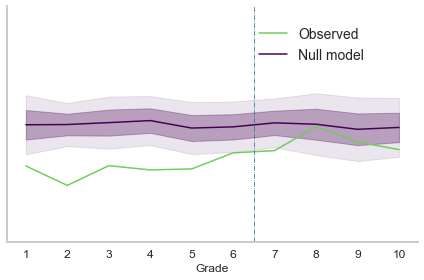

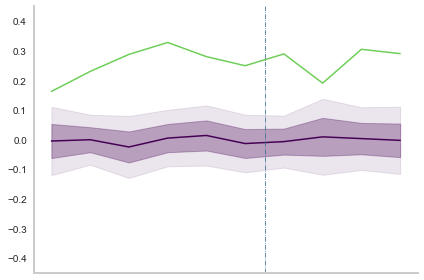

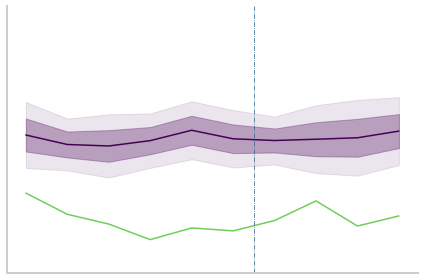

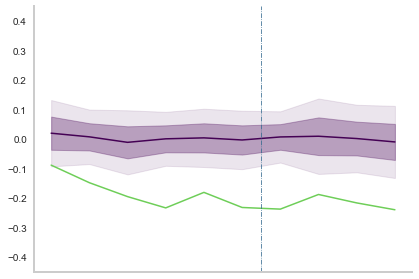

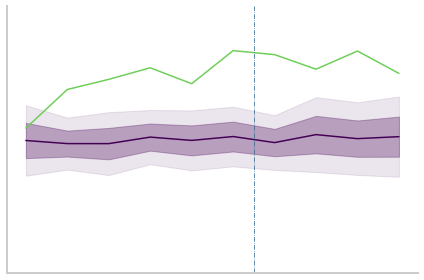

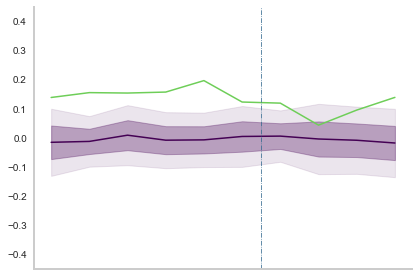

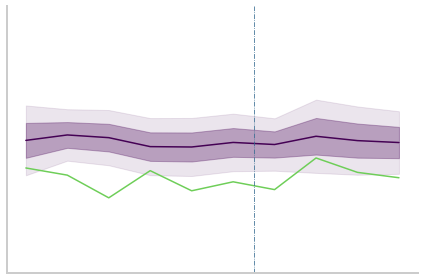

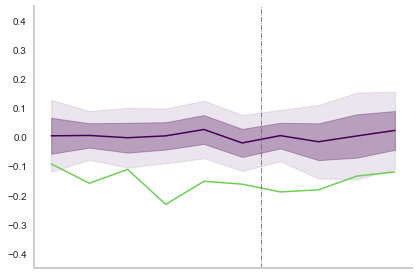

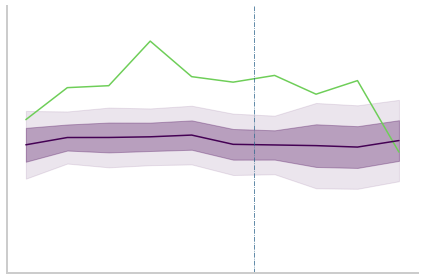

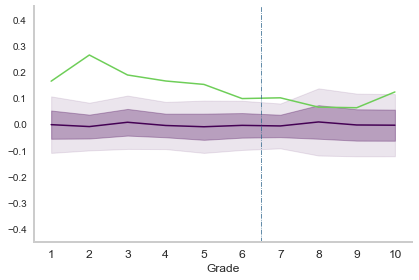

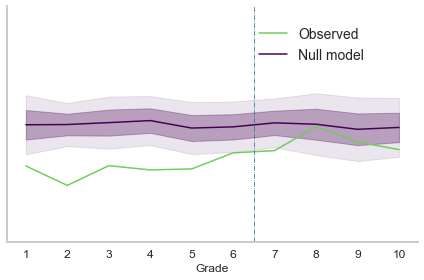

In [5]:
# Not run
# Work yes
df = tt.loc[tt.question == "work_yes", ["period", "classroom", "gender", "student", "value"]].drop_duplicates()
cor_evo_plot(computations_with_baselines(df, "II", theta), lims=lims, plot_name="A_work_yes_good", xlabels=False)
cor_evo_plot(computations_with_baselines(df, "I", theta), lims=lims, plot_name="B_work_yes_bad", xlabels=False, ylabels=False)
# Work no
df = tt.loc[tt.question == "work_no", ["period", "classroom", "gender", "student", "value"]].drop_duplicates()
cor_evo_plot(computations_with_baselines(df, "II", theta), lims=lims, plot_name="C_work_no_good", xlabels=False)
cor_evo_plot(computations_with_baselines(df, "I", theta), lims=lims, plot_name="D_work_no_bad", xlabels=False, ylabels=False)
# Play yes
df = tt.loc[tt.question == "play_yes", ["period", "classroom", "gender", "student", "value"]].drop_duplicates().dropna()
cor_evo_plot(computations_with_baselines(df, "II", theta), lims=lims, plot_name="E_play_yes_good", xlabels=False)
cor_evo_plot(computations_with_baselines(df, "I", theta), lims=lims, plot_name="F_play_yes_bad", xlabels=False, ylabels=False)
# Play no
df = tt.loc[tt.question == "play_no", ["period", "classroom", "gender", "student", "value"]].drop_duplicates()
cor_evo_plot(computations_with_baselines(df, "II", theta), lims=lims, plot_name="G_play_no_good", xlabels=False)
cor_evo_plot(computations_with_baselines(df, "I", theta), lims=lims, plot_name="H_play_no_bad", xlabels=False, ylabels=False)
# Friends
df = tt.loc[tt.question == "friend", ["period", "classroom", "gender", "student", "value"]].drop_duplicates()
cor_evo_plot(computations_with_baselines(df, "II", theta), lims=lims, plot_name="I_friends_good")
cor_evo_plot(computations_with_baselines(df, "I", theta), lims=lims, plot_name="J_friends_bad", legend=True,
             ylabels=False)

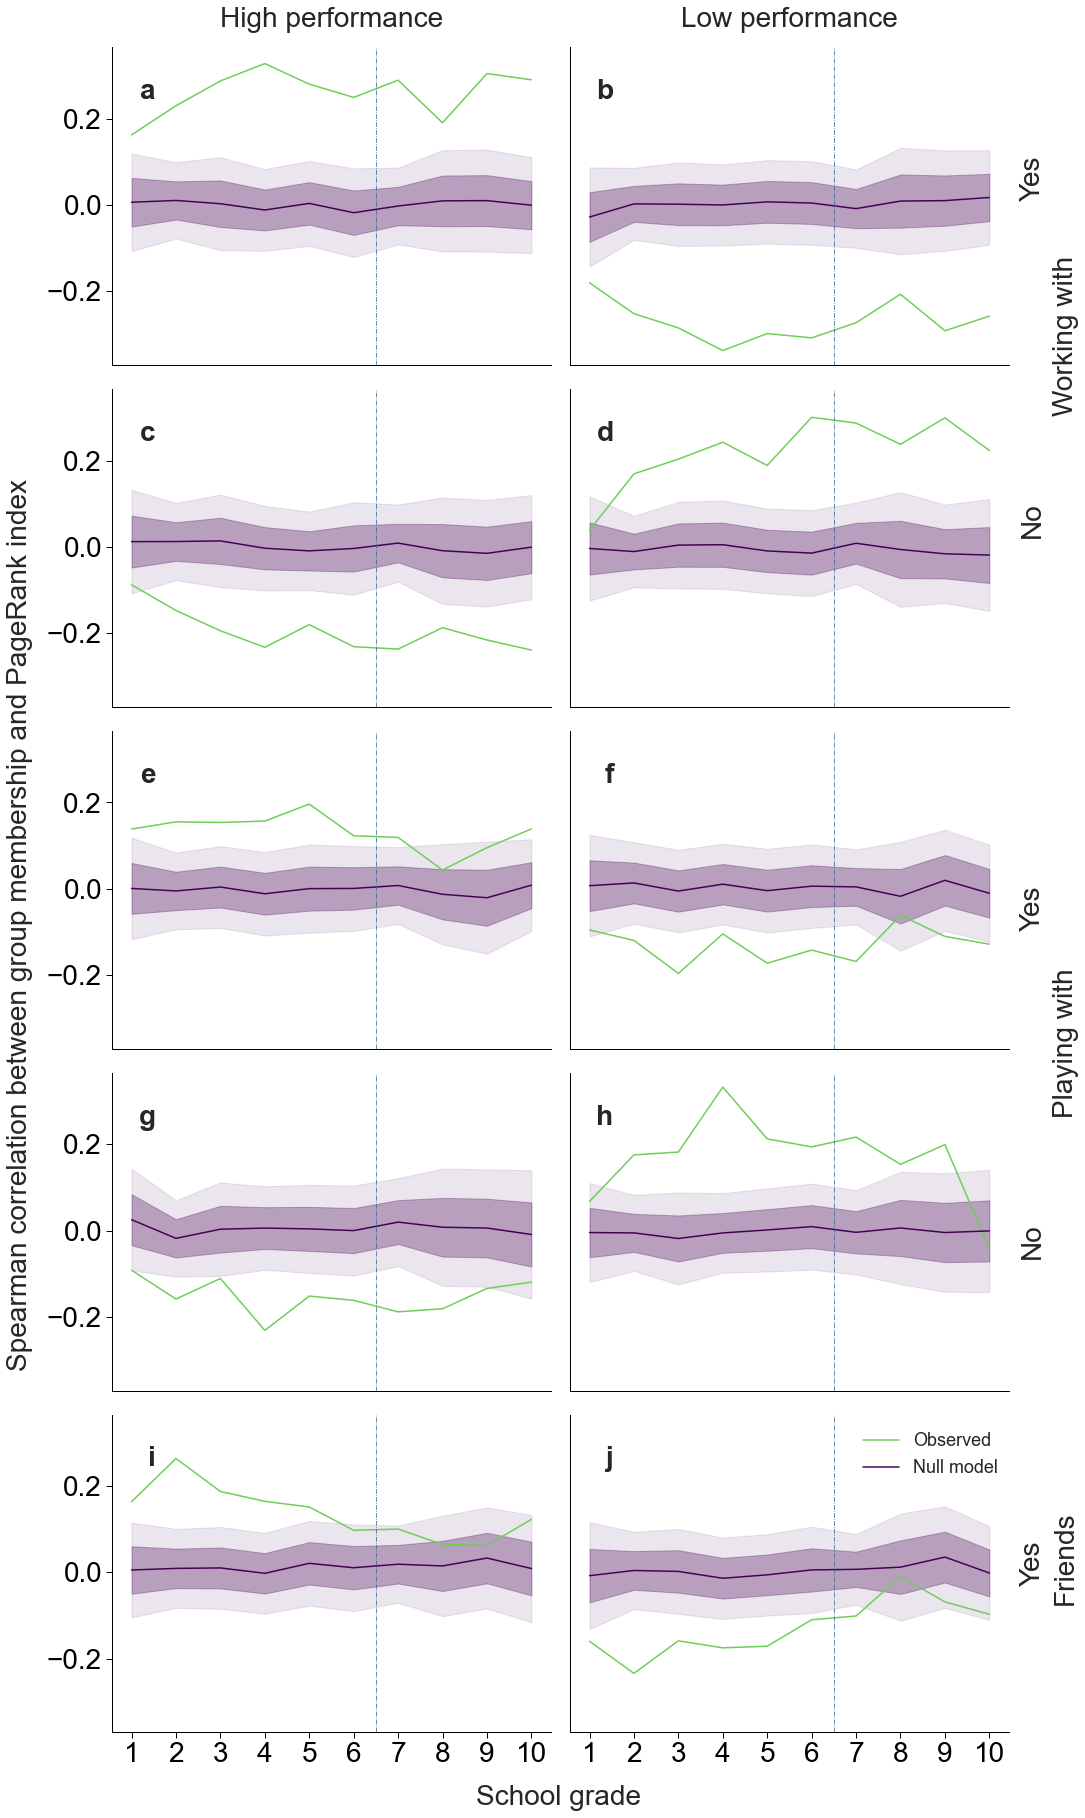

In [8]:
sns.set(font_scale=1.4, style="whitegrid")

def cor_evo_plot(cc, ax, legend=False):

    i = 0
    for name, a in cc.items():

        x, y, ci1, vals = structure_cor_means(a, 1)
        x, y, ci2, vals = structure_cor_means(a, 2)
        x = correct_grades(x)

        ax.plot(x, y, label=name, color = colours[i])
        if name != "Observed":
            ax.fill_between(x, (y - ci1), (y + ci1), color=colours[i], alpha=.3)
            ax.fill_between(x, (y - ci2), (y + ci2), color=colours[i], alpha=.1)

        i += 1

    # vertical dashed line between 6 and 7
    ax.axvline(x=6.5, color='#31688e', linestyle='-.', linewidth = .75)

    ax.grid(False)

    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines[['left', 'bottom']].set_linewidth(1)  

    if legend:
        plt.legend(loc=(0.65, .78), prop={'size': 18},frameon=False, fontsize=FONT_BIG)

    return fig

# Setup for large figure with multiple subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 26), sharey=True, sharex=True)

# Titles for columns
column_titles = ["High performance", "Low performance"]
for ax, col_title in zip(axes[0], column_titles):
    ax.set_title(col_title, fontsize=FONT_BIG, pad=20)

# Shared Y-axis label
fig.text(0.04, 0.5, 'Spearman correlation between group membership and PageRank index', 
         va='center', rotation='vertical', fontsize=FONT_BIG)

# Shared X-axis label
fig.text(0.55, 0.03, 'School grade', ha='center', fontsize=FONT_BIG)

# right y axes
right_align = 0.99
right_shift = 0.03
fig.text(right_align, 0.89, 'Yes', rotation='vertical', ha='center', fontsize=FONT_BIG)
fig.text(right_align, 0.71, 'No', rotation='vertical', ha='center', fontsize=FONT_BIG)
fig.text(right_align, 0.5, 'Yes', rotation='vertical', ha='center', fontsize=FONT_BIG)
fig.text(right_align, 0.325, 'No', rotation='vertical', ha='center', fontsize=FONT_BIG)
fig.text(right_align, 0.15, 'Yes', rotation='vertical', ha='center', fontsize=FONT_BIG)

fig.text(right_align + right_shift, 0.775, 'Working with', rotation='vertical', ha='center', fontsize=FONT_BIG)
fig.text(right_align + right_shift, 0.4, 'Playing with', rotation='vertical', ha='center', fontsize=FONT_BIG)
fig.text(right_align + right_shift, 0.14, 'Friends', rotation='vertical', ha='center', fontsize=FONT_BIG)


# List of questions and conditions
questions = ["work_yes", "work_no", "play_yes", "play_no", "friend"]
conditions = ["II", "I"]
plot_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]

# Iterate over each subplot and generate the plots
for i, question in enumerate(questions):
    df = tt.loc[tt.question == question, ["period", "classroom", "gender", "student", "value"]].drop_duplicates()

    for j, condition in enumerate(conditions):
        ax = axes[i, j]
        data = computations_with_baselines(df, condition, theta)
        cor_evo_plot(data, ax, legend=(i == 4 and j == 1))
        
        # Adding plot identifier (a, b, c, ...)
        add_plot_labels(ax, plot_labels[i * 2 + j])

# After creating all the subplots, add the legend to the bottom left plot
bottom_left_ax = axes[-1, 0]

# All in black
paint_it_black(axes)

for i in range(5):
    for j in range(2):
        ax = axes[i, j]
        
        # Set x-axis ticks to show every label from 1 to 10
        ax.set_xticks(np.arange(1, 11, 1))
        ax.set_xticklabels(np.arange(1, 11, 1), color="black")
        if i == 4:
            ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True, labelsize=FONT_BIG)
        if j == 0:
            ax.tick_params(axis='y', which='both', left=True, labelleft=True, labelsize=FONT_BIG)

# Adjust layout
fig.tight_layout(rect=[0.06, 0.04, 1, 1])

# Save the figure
fig.savefig("../plots/figure_5_combined_correlations_plot.pdf", dpi=300, bbox_inches='tight')